# UN Data Exploration Project

1. Download two CSV files and place them in the data folder of your local
Data Question 1 repository:

a. Gross Domestic Product (GDP) per capita:
http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY
.GDP.PCAP.PP.KD
• DO NOT APPLY ANY FILTERS
• rename the file to gdp_per_capita.csv
• open it with a text editor (not Excel) and take a look

b. Percentage of Individuals using the Internet:
http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H
• DO NOT APPLY ANY FILTERS
• rename the file to internet_use.csv
• open it with a text editor (not Excel) and take a look
## Done

2. Create a Jupyter Notebook in the notebooks folder and name it
UN_Data_Exploration.

• You are likely to get errors along the way. When you do, read the
errors to try to understand what is happening and how to correct it.
• Use markdown cells to record your answers to any questions asked
in this exercise. On the menu bar, you can toggle the cell type from
‘Code’ to ‘Markdown’. Here is a link to a cheat sheet showing the
basics of styling text using Markdown.

## Done

3. In the first cell of your notebook, import the required packages with their
customary aliases as follows:
    
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

Keep all imports in this cell at the top of your notebook.

4. At the bottom of your imports cell, use the %matplotlib inline magic
command so that your plots show in the notebook without having to call
plt.show() every time.

### Done

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your
notebook as a DataFrame called gdp_df.

• Take a look at the first 10 rows.

• Look at the last 5 rows. Do you see a problem?

• Redo the read_csv() call to correct this issue - do not modify the
original csv file.

### Done


In [2]:
gdp_df = pd.read_csv("../gdp_per_capita.csv")

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [5]:
gdp_df.tail()
#We have unneeded rows at the bottom, need to reread the data without these

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [9]:
gdp_df = pd.read_csv("../gdp_per_capita.csv", nrows=6727)

In [10]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [15]:
gdp_df.shape
#We have the correct number of rows now

(6727, 4)

In [16]:
gdp_df.tail()
#And the data at the bottom looks good

,Country or Area,Year,Value,Value Footnotes
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN


6. Drop the ‘Value Footnotes’ column, and rename the remaining columns to
‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

### Done

In [80]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

KeyError: "['Value Footnotes'] not found in axis"

In [ ]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country'}) = df.rename(columns={'A': 'a'}, index={'ONE': 'one'})

In [19]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


7. How many rows and columns does gdp_df have? What are the data types
of its columns? If any of the columns are not the expected types, figure
out why and fix it.<br>

Rows: 6727
Columns: 3
Country or Area column is an object, is this okay?

### Question

In [21]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6727 non-null   object 
 1   Year             6727 non-null   int64  
 2   Value            6727 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [25]:
gdp_df['Country or Area'].value_counts()

Tajikistan                                            29
Dem. Rep. Congo                                       29
Central African Republic                              29
CÃ´te d'Ivoire                                        29
Poland                                                29
Mauritania                                            29
China                                                 29
Middle East & North Africa                            29
Iceland                                               29
IDA total                                             29
Nicaragua                                             29
Nigeria                                               29
Uganda                                                29
Barbados                                              29
Argentina                                             29
Tuvalu                                                29
Guatemala                                             29
Uruguay                        

In [24]:
pd.options.display.max_rows = 999

8. Which years are represented in this dataset? Take a look at the number of
observations per year. What do you notice?<br>
Years: 1990-2011<br>
The number of areas reported on each year grows from 209 to 243.

### Done


In [26]:
gdp_df['Year'].value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    210
1990    209
Name: Year, dtype: int64

9. How many countries are represented in this dataset? Which countries are
least represented in the dataset? Why do you think these countries have
so few observations?<br><br>
Countries: 243<br>
Countries with few values: Some of these have had civil wars in the affected time period, a few of the countries are new. Some are territories of other countries and may possible have irregular reporting becauseo of this.<br><br>
### Done


In [35]:
gdp_countries = gdp_df['Country or Area'].value_counts()
print('Head')
print(gdp_countries.head())
print('Tail - Least Represented')
print(gdp_countries.tail(10))
gdp_countries.shape

Head
Tajikistan                  29
Dem. Rep. Congo             29
Central African Republic    29
CÃ´te d'Ivoire              29
Poland                      29
Name: Country or Area, dtype: int64
Tail - Least Represented
CuraÃ§ao                     19
Qatar                        19
Kosovo                       19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country or Area, dtype: int64


(243,)

In [39]:
gdp_countries.sort_index()

Afghanistan                                           17
Albania                                               29
Algeria                                               29
Angola                                                29
Antigua and Barbuda                                   29
Arab World                                            29
Argentina                                             29
Armenia                                               29
Aruba                                                 28
Australia                                             29
Austria                                               29
Azerbaijan                                            29
Bahrain                                               29
Bangladesh                                            29
Barbados                                              29
Belarus                                               29
Belgium                                               29
Belize                         

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call
this new dataframe gdp_2014.<br><br>
### Done

In [69]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]
#gdp_2014.head()

,Country or Area,Year,Value
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


11. Use .describe() to find the summary statistics for GDP per capita in
2014.<br><br>
### Done

In [70]:
gdp_2014.describe()

,Year,Value
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish
to adjust the number of bins for your histogram). How would you describe
the shape of the distribution?


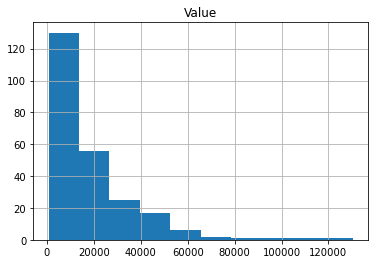

In [79]:
gdp_2014.hist('Value');

14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017
(using the pandas .pivot_table() method or another method) so that
each row corresponds to a country, each column corresponds to a year,
and the values in the table give the GDP_Per_Capita amount. Drop any
rows that are missing values for either 1990 or 2017. Save the result to a
dataframe named gdp_pivoted.

In [62]:
filtered_gdp = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2017)]

In [65]:
filtered_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 1 to 6701
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  448 non-null    object 
 1   Year             448 non-null    int64  
 2   Value            448 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.0+ KB


In [64]:
print(filtered_gdp[filtered_gdp['Year']==2017])

                                        Country or Area  Year          Value
1                                           Afghanistan  2017    1758.465636
18                                              Albania  2017   11796.719185
47                                              Algeria  2017   13822.389087
76                                               Angola  2017    6044.972035
105                                 Antigua and Barbuda  2017   22400.379562
134                                          Arab World  2017   15542.746104
163                                           Argentina  2017   18945.144022
192                                             Armenia  2017    8744.731368
220                                               Aruba  2017   35861.828118
249                                           Australia  2017   44781.322760
278                                             Austria  2017   45421.425400
307                                          Azerbaijan  2017   15929.399631

In [74]:
pivot_gdp = filtered_gdp.pivot_table(values='Value',columns='Year',index='Country or Area').dropna()

Year,1990,2017
Country or Area,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
Argentina,11372.823108,18945.144022
Armenia,3742.431024,8744.731368
Aruba,37140.024657,35861.828118
Australia,28669.059474,44781.322760


In [76]:
pivot_gdp.shape

(208, 2)